In [138]:
# Import required modules
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.metrics import classification_report
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn import model_selection
from sklearn import tree

In [139]:
#Citation Request:
#  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
#  Please include this citation if you plan to use this database:

#  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
#  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

#  Available at: [pdf] http://hdl.handle.net/1822/14838
#                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

#1. Title: Bank Marketing

#2. Sources
#   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
#3. Past Usage:

#  The full dataset was described and analyzed in:

#  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
#  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, 
#  Portugal, October, 2011. EUROSIS.

#4. Relevant Information:

#   The data is related with direct marketing campaigns of a Portuguese banking institution. 
#   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
#   in order to access if the product (bank term deposit) would be (or not) subscribed. 

#   There are two datasets: 
#      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
#      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
#   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

#   The classification goal is to predict if the client will subscribe a term deposit (variable y).

#5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

#6. Number of Attributes: 16 + output attribute.

#7. Attribute information:

#   For more information, read [Moro et al., 2011].

#   Input variables:
   # bank client data:
#   1 - age (numeric)
#   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
#                                       "blue-collar","self-employed","retired","technician","services") 
#   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
#   4 - education (categorical: "unknown","secondary","primary","tertiary")
#   5 - default: has credit in default? (binary: "yes","no")
#   6 - balance: average yearly balance, in euros (numeric) 
#   7 - housing: has housing loan? (binary: "yes","no")
#   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
#   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
#  10 - day: last contact day of the month (numeric)
#  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
#  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
#  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
#  15 - previous: number of contacts performed before this campaign and for this client (numeric)
#  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

#  Output variable (desired target):
#  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

#8. Missing Attribute Values: None

In [140]:
# Read the dataset
bank = pd.read_csv("bank.csv")

# View sample of data
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [141]:
# Shape of data
print('The shape of df is:', bank.shape)

The shape of df is: (4521, 17)


In [142]:
# Information of data
bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 423.9+ KB


In [143]:
#Information of data with categorical features
print(bank["job"].value_counts())
print("*"*25)
print(bank["marital"].value_counts())
print("*"*25)
print(bank["education"].value_counts())

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
*************************
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
*************************
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64


<IPython.core.display.Javascript object>

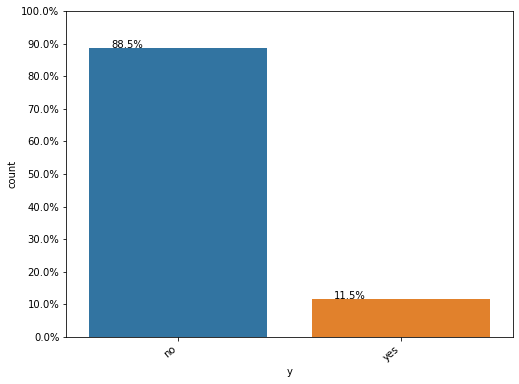

In [144]:
# y variable composition
plt.figure(figsize=(8,6))
Y = bank["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=bank)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))


ax.yaxis.set_ticks(np.linspace(0, total, 11))
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()

In [145]:
def countplot_withY(label, dataset):
    plt.figure(figsize=(20,10))
    Y = bank[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=bank, hue="y")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))


    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()

<IPython.core.display.Javascript object>

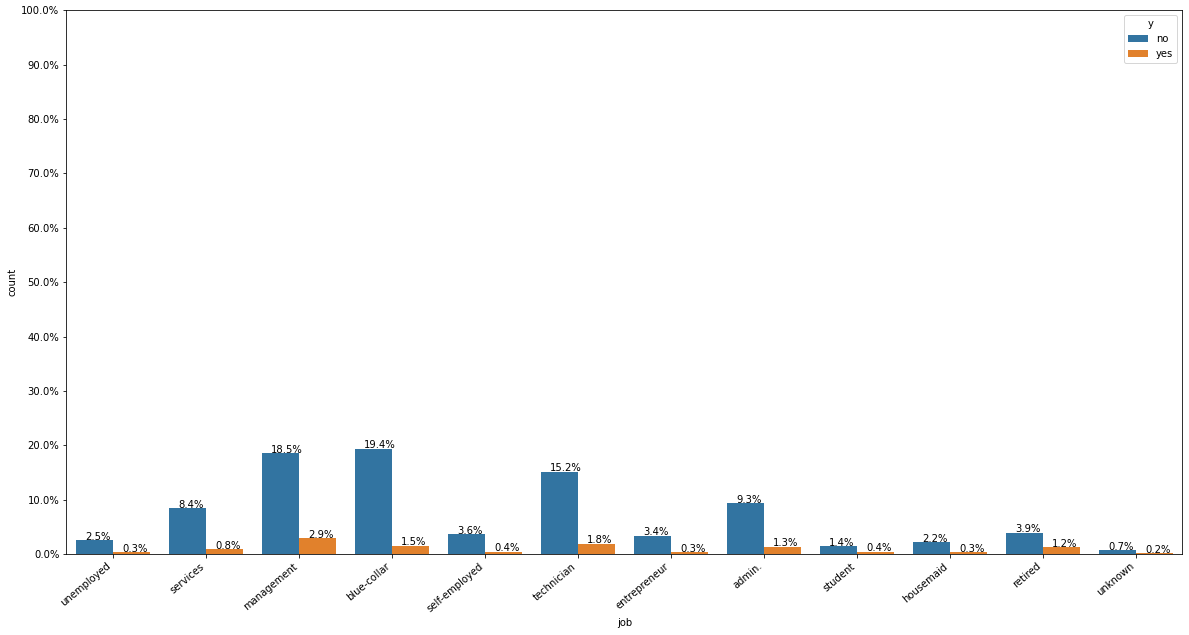

In [146]:
countplot_withY("job", bank)

<IPython.core.display.Javascript object>

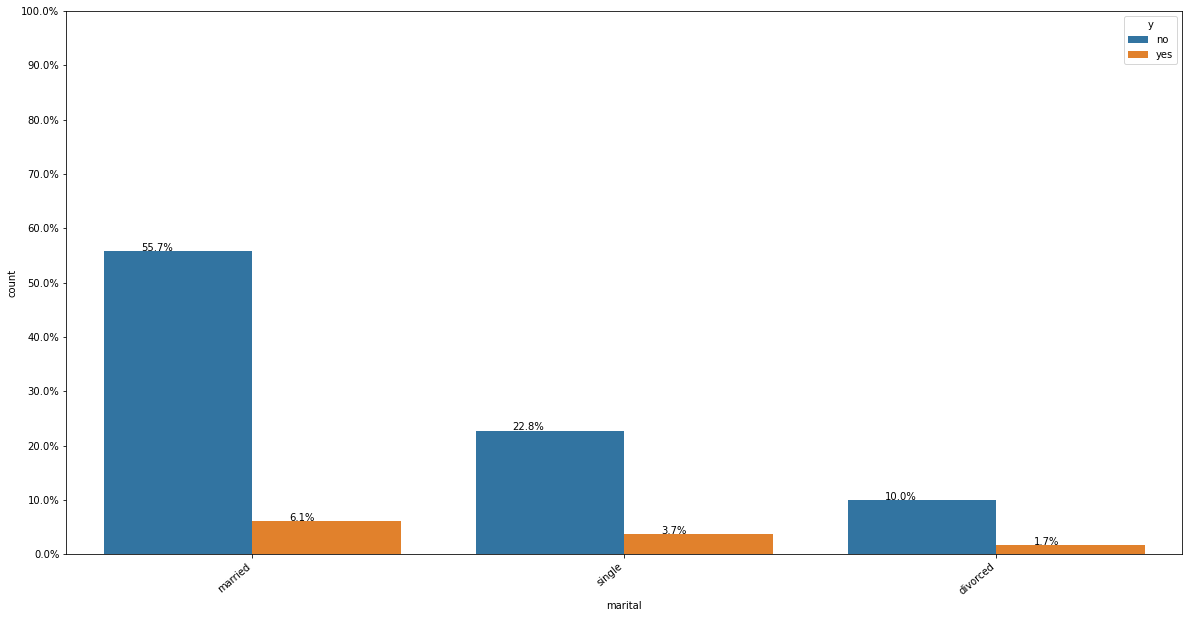

In [147]:
countplot_withY("marital", bank)

<IPython.core.display.Javascript object>

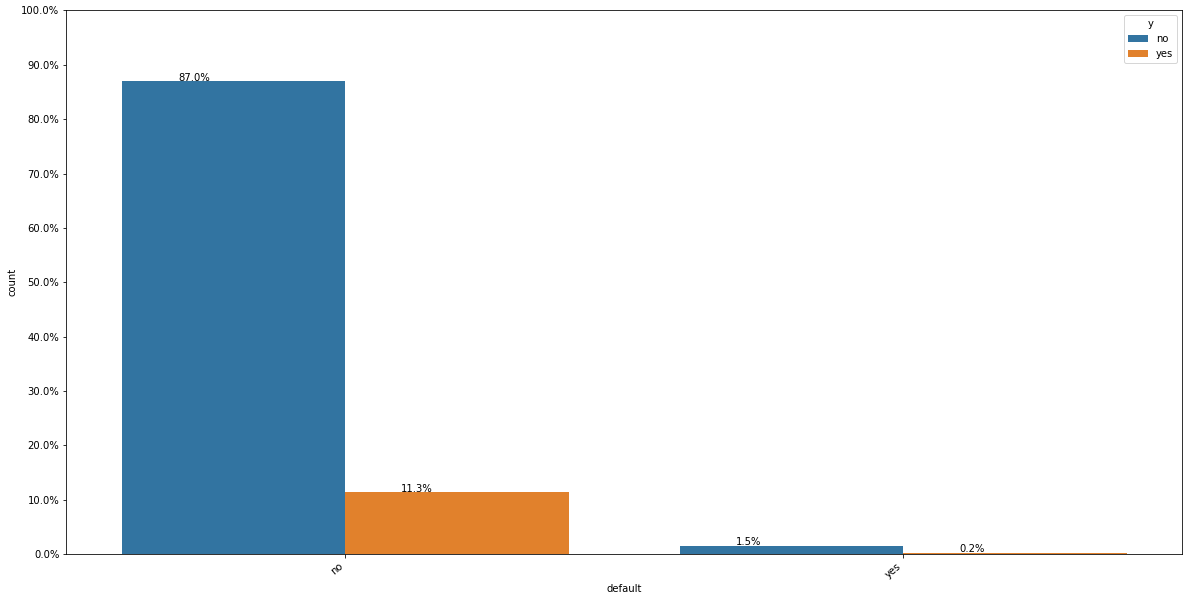

In [148]:
countplot_withY("default", bank)

<IPython.core.display.Javascript object>

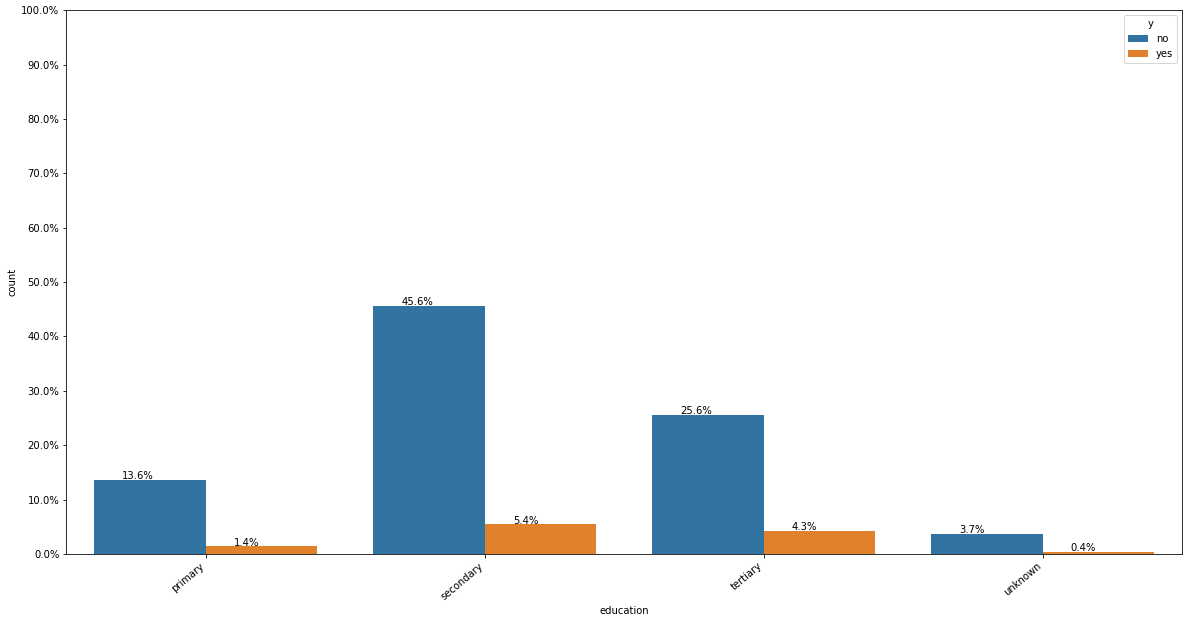

In [149]:
countplot_withY("education", bank)

<IPython.core.display.Javascript object>

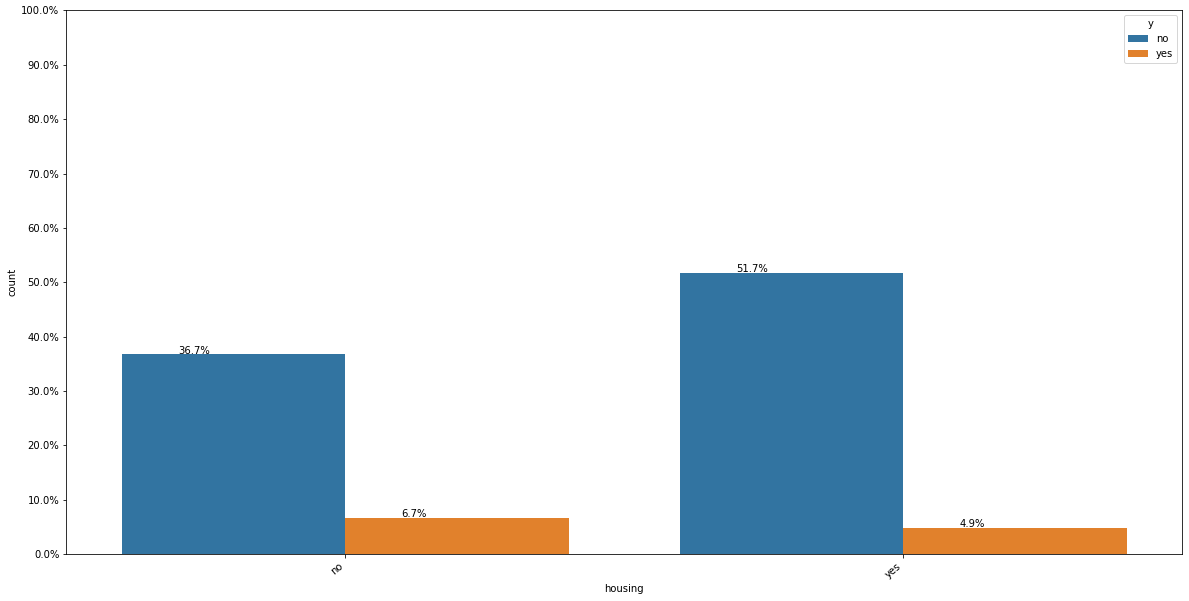

In [150]:
countplot_withY("housing", bank)

<IPython.core.display.Javascript object>

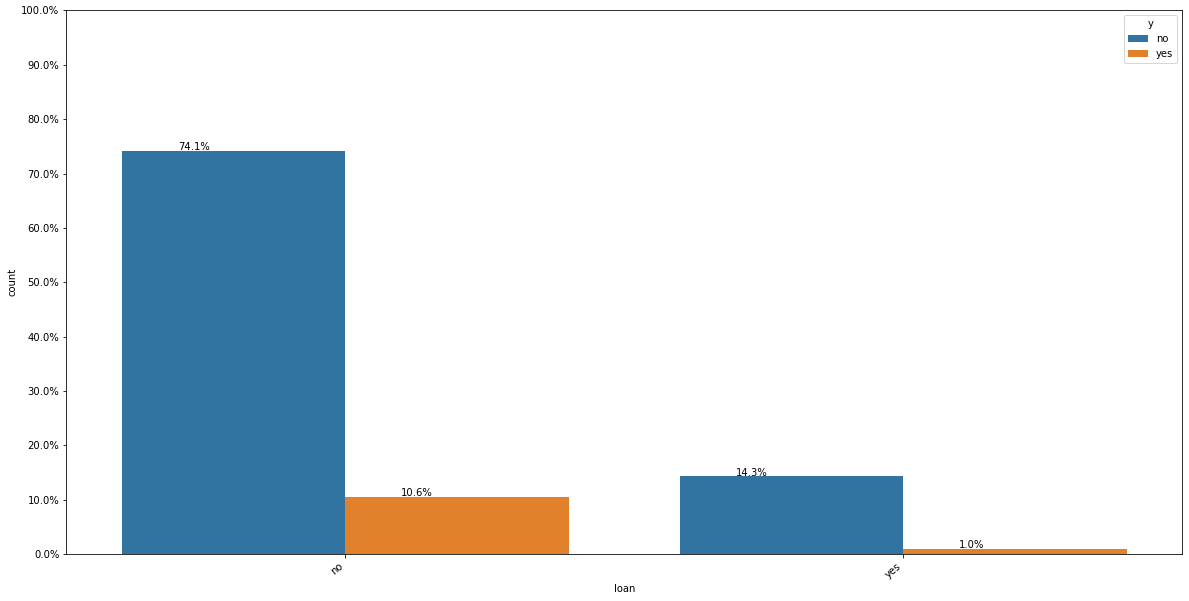

In [151]:
countplot_withY("loan", bank)

<IPython.core.display.Javascript object>

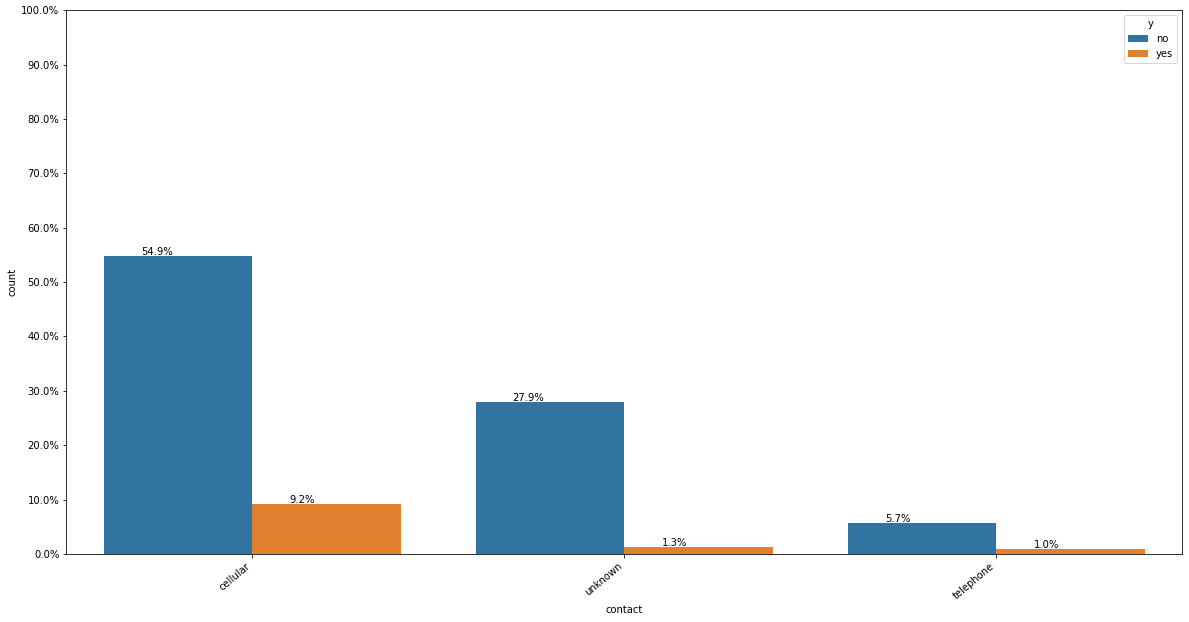

In [152]:
countplot_withY("contact", bank)

<IPython.core.display.Javascript object>

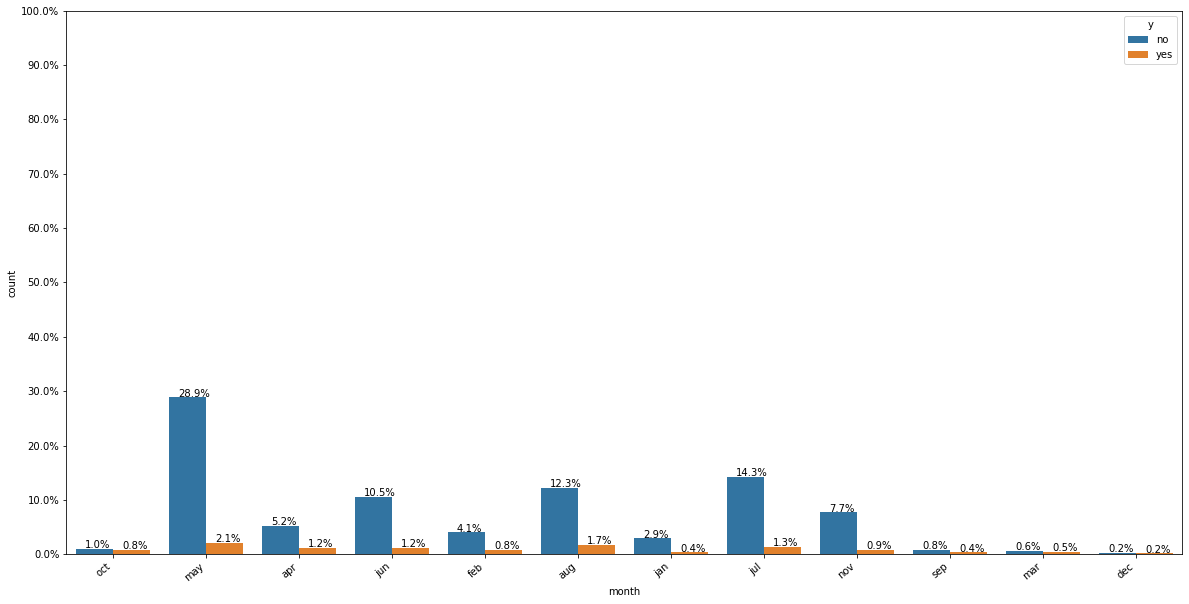

In [153]:
countplot_withY("month", bank)

<IPython.core.display.Javascript object>

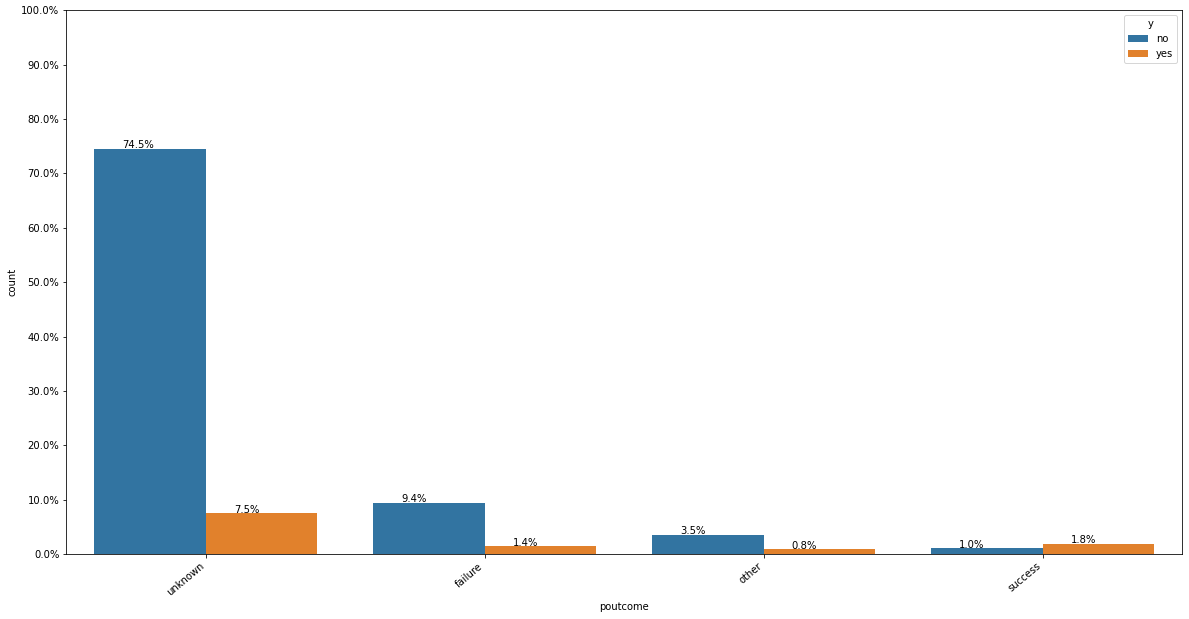

In [154]:
countplot_withY("poutcome", bank)

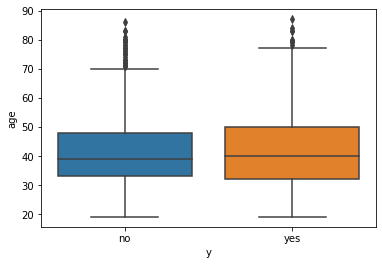

In [155]:
%matplotlib inline
sns.boxplot(data=bank, x="y", y="age")
plt.show()

c:\users\weiqu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

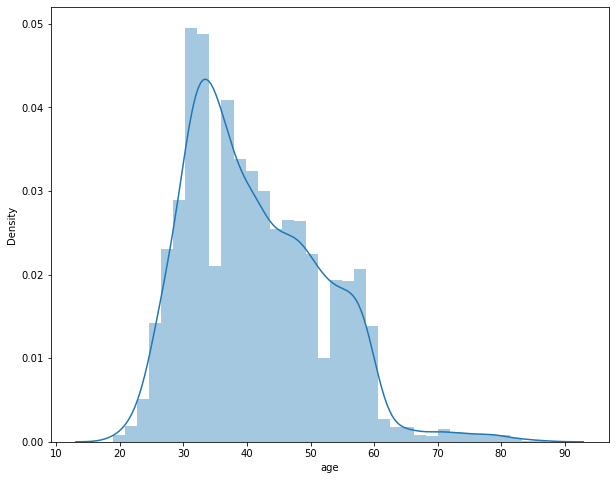

In [156]:
plt.figure(figsize=(10,8))
sns.distplot(bank["age"])

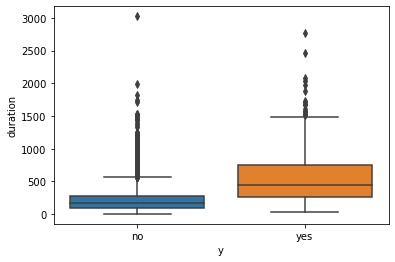

In [157]:
%matplotlib inline
sns.boxplot(data=bank, x="y", y="duration")
plt.show()

c:\users\weiqu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


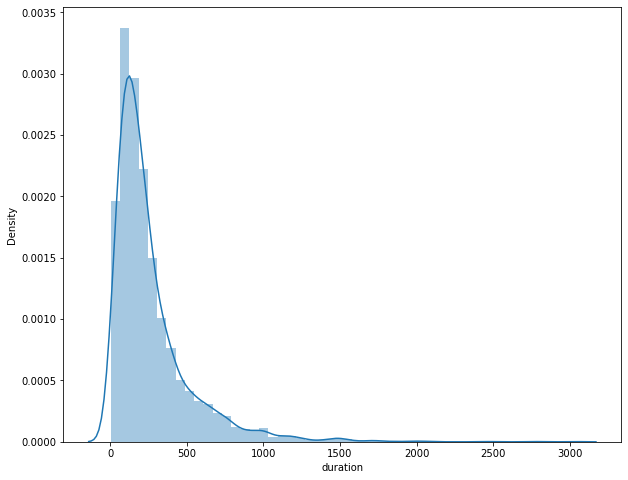

In [158]:
plt.figure(figsize=(10,8))
sns.distplot(bank["duration"])
plt.show()

Text(0.5, 1.05, 'Pearson correlation of Features')

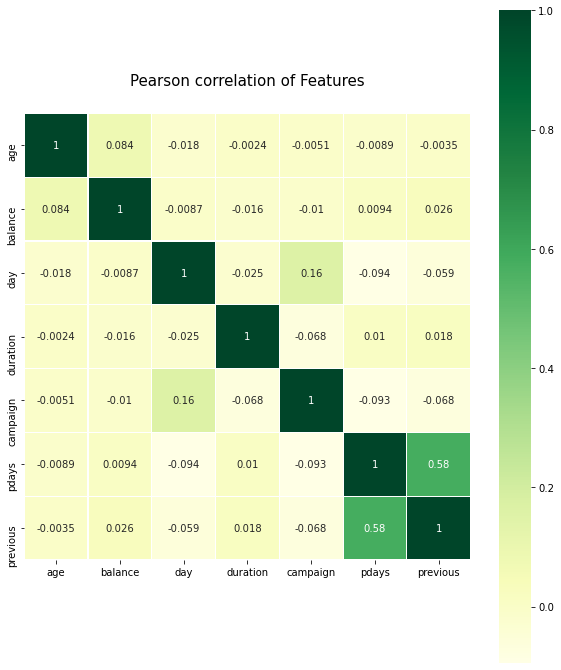

In [159]:
# Pearson Correlation of Features
# The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. 
# It is the normalization of the covariance between the two variables to give an interpretable score.

%matplotlib inline
corr = bank.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

In [160]:
# Categorical Data Check
categorical_cols = bank.select_dtypes(include=[object])
categorical_cols.head(3)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no


In [161]:
## Option 1: 
from sklearn import preprocessing
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [162]:
le = preprocessing.LabelEncoder()
bank2 = bank.apply(le.fit_transform)
bank2.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3,0
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0
5,16,4,2,2,0,934,0,0,0,22,3,137,1,109,3,0,0
6,17,6,1,2,0,569,1,0,0,13,8,337,0,219,2,1,0
7,20,9,1,1,0,420,1,0,0,5,8,147,1,0,0,3,0
8,22,2,1,2,0,491,1,0,2,13,8,53,1,0,0,3,0
9,24,7,1,0,0,218,1,1,0,16,0,309,0,84,2,0,0


In [163]:
#Option 1: training & results
X = bank2.iloc[:, :-1].values
y = bank2.iloc[:, 16].values

seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = seed)
clf = RandomForestClassifier(n_estimators = 100,oob_score=True, max_features = 'auto', bootstrap=True,  random_state=seed)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[768  22]
 [ 84  31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       790
           1       0.58      0.27      0.37       115

    accuracy                           0.88       905
   macro avg       0.74      0.62      0.65       905
weighted avg       0.86      0.88      0.86       905

Accuracy: 0.8828729281767956


No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.895


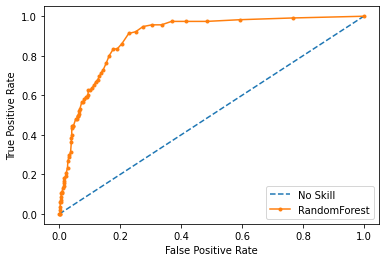

In [164]:
#Option 1: ROC
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RandomForest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Feature ranking:
1. feature 11 (0.295872)
2. feature 5 (0.105698)
3. feature 0 (0.104319)
4. feature 9 (0.087834)
5. feature 10 (0.072706)
6. feature 13 (0.053105)
7. feature 1 (0.051139)
8. feature 15 (0.047971)
9. feature 12 (0.039751)
10. feature 3 (0.030148)
11. feature 2 (0.026811)
12. feature 14 (0.025007)
13. feature 6 (0.023912)
14. feature 8 (0.022479)
15. feature 7 (0.009528)
16. feature 4 (0.003720)


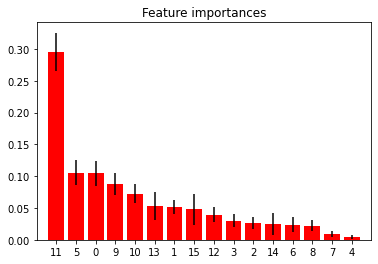

In [165]:
#Option 1: Feature Importance
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [166]:
#Option 2 - Dummy Variable

bankdum = pd.concat([bank[['age', 'balance','duration', 'campaign','pdays','previous', 'y']], pd.get_dummies(bank[['job','marital','education','contact','poutcome']])], axis =1)

bankdum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  4521 non-null   int64 
 1   balance              4521 non-null   int64 
 2   duration             4521 non-null   int64 
 3   campaign             4521 non-null   int64 
 4   pdays                4521 non-null   int64 
 5   previous             4521 non-null   int64 
 6   y                    4521 non-null   object
 7   job_admin.           4521 non-null   uint8 
 8   job_blue-collar      4521 non-null   uint8 
 9   job_entrepreneur     4521 non-null   uint8 
 10  job_housemaid        4521 non-null   uint8 
 11  job_management       4521 non-null   uint8 
 12  job_retired          4521 non-null   uint8 
 13  job_self-employed    4521 non-null   uint8 
 14  job_services         4521 non-null   uint8 
 15  job_student          4521 non-null   uint8 
 16  job_te

In [167]:
bankdum = bankdum[['age','balance','duration','campaign','pdays','previous','job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed','job_services','job_student','job_technician','job_unemployed','job_unknown','marital_divorced','marital_married','marital_single','education_primary','education_secondary','education_tertiary','education_unknown','contact_cellular','contact_telephone','contact_unknown','poutcome_failure','poutcome_other','poutcome_success','poutcome_unknown','y']]

bankdum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  4521 non-null   int64 
 1   balance              4521 non-null   int64 
 2   duration             4521 non-null   int64 
 3   campaign             4521 non-null   int64 
 4   pdays                4521 non-null   int64 
 5   previous             4521 non-null   int64 
 6   job_admin.           4521 non-null   uint8 
 7   job_blue-collar      4521 non-null   uint8 
 8   job_entrepreneur     4521 non-null   uint8 
 9   job_housemaid        4521 non-null   uint8 
 10  job_management       4521 non-null   uint8 
 11  job_retired          4521 non-null   uint8 
 12  job_self-employed    4521 non-null   uint8 
 13  job_services         4521 non-null   uint8 
 14  job_student          4521 non-null   uint8 
 15  job_technician       4521 non-null   uint8 
 16  job_un

In [168]:
Xa = bankdum.iloc[:, :-1].values
ya = bankdum.iloc[:, 32].values

clfa = RandomForestClassifier(n_estimators = 100,oob_score=True, max_features = 'auto', bootstrap=True, random_state=seed)

X_traina, X_testa, y_traina, y_testa = train_test_split(Xa, ya, test_size = 0.20, random_state = seed)
clfa.fit(X_traina, y_traina)
y_preda = clfa.predict(X_testa)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_testa, y_preda)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_testa, y_preda)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_testa,y_preda)
print("Accuracy:",result2)

Confusion Matrix:
[[770  20]
 [ 85  30]]
Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.97      0.94       790
         yes       0.60      0.26      0.36       115

    accuracy                           0.88       905
   macro avg       0.75      0.62      0.65       905
weighted avg       0.86      0.88      0.86       905

Accuracy: 0.8839779005524862


In [169]:
#Option 2: ROC
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_testa))]
# predict probabilities
lr_probs = clfa.predict_proba(X_testa)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_testa, ns_probs)
lr_auc = roc_auc_score(y_testa, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))


No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.847


In [170]:
bank2.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3,0
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0


In [171]:
categorical_cols = bank.select_dtypes(include=[object])
categorical_cols.head(3)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no


In [172]:
#option 3: drop some variables
bank3 = bank2.drop(['job','marital','education','default','housing','day','poutcome'], axis=1)
bank3.head(5)

,age,balance,loan,contact,month,duration,campaign,pdays,previous,y
0,11,1475,0,0,10,75,0,0,0,0
1,14,2030,1,0,8,216,0,228,4,0
2,16,1303,0,0,0,181,0,219,1,0
3,11,1352,1,2,6,195,3,0,0,0
4,40,274,0,2,8,222,0,0,0,0


In [173]:
bank3.reindex
X3 = bank3.iloc[:, :-1].values
y3 = bank3.iloc[:, 9].values

seed = 1
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.20, random_state = seed)
clf3 = RandomForestClassifier(n_estimators = 100,oob_score=True, max_features = 'auto', bootstrap=True, random_state=seed)
clf3.fit(X_train3, y_train3)
y_pred3 = clf3.predict(X_test3)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test3, y_pred3)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test3, y_pred3)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test3,y_pred3)
print("Accuracy:",result2)

Confusion Matrix:
[[765  25]
 [ 82  33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       790
           1       0.57      0.29      0.38       115

    accuracy                           0.88       905
   macro avg       0.74      0.63      0.66       905
weighted avg       0.86      0.88      0.86       905

Accuracy: 0.881767955801105


In [174]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test3))]
# predict probabilities
lr_probs = clf3.predict_proba(X_test3)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test3, ns_probs)
lr_auc = roc_auc_score(y_test3, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.891
